In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.0,random_state=101)

In [4]:
X,y = data

In [6]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [7]:
feat = pd.DataFrame(X)

In [8]:
feat = pd.concat([feat,z_noise],axis=1)

In [9]:
feat.columns = ['X1','X2','X3']

In [10]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


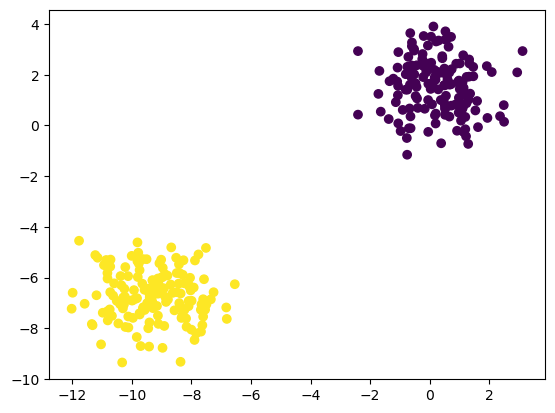

In [11]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [13]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


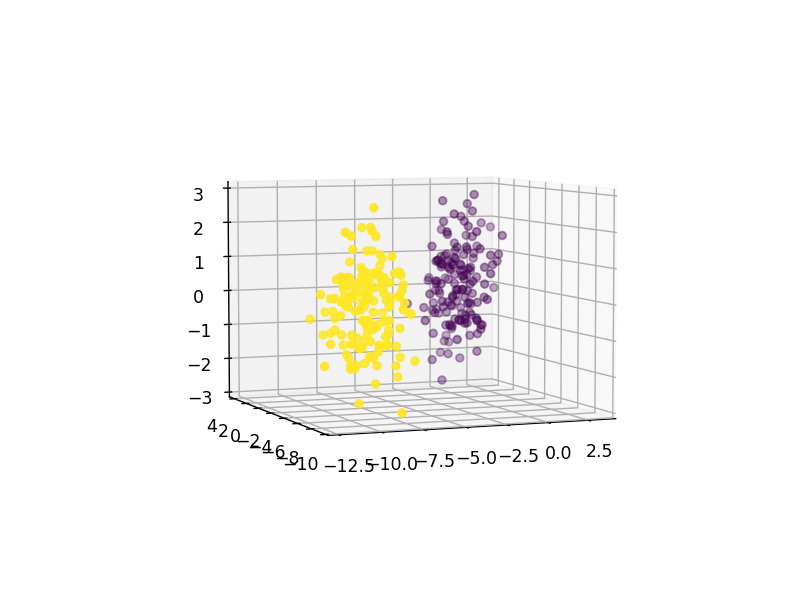

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [16]:
%matplotlib notebook

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [20]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [21]:
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [22]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaled_data = scaler.fit_transform(feat)

In [26]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2981
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 0.2895
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2759
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2704


In [27]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 1ms/step


In [29]:
encoded_2dim.shape

(300, 2)

In [30]:
scaled_data.shape

(300, 3)

<IPython.core.display.Javascript object>


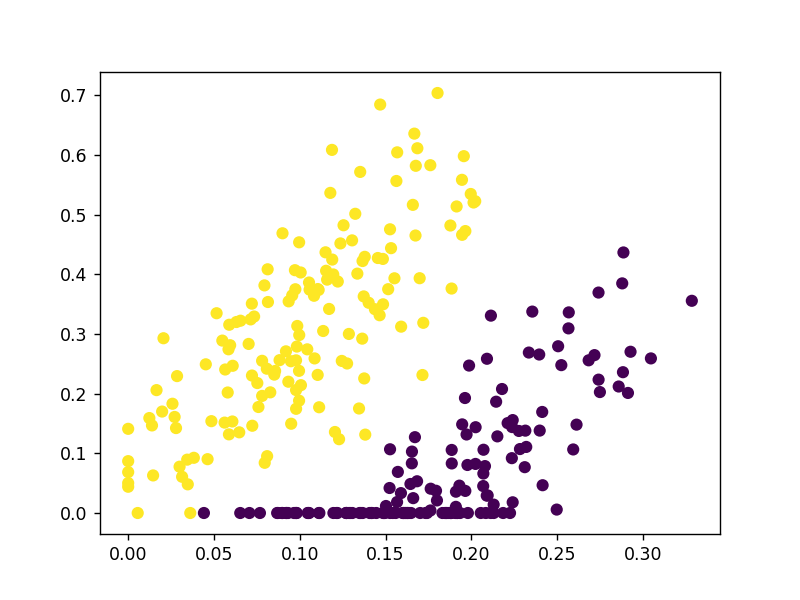

In [32]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)